/tmp/ipykernel_2143059/574882844.py:45: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(


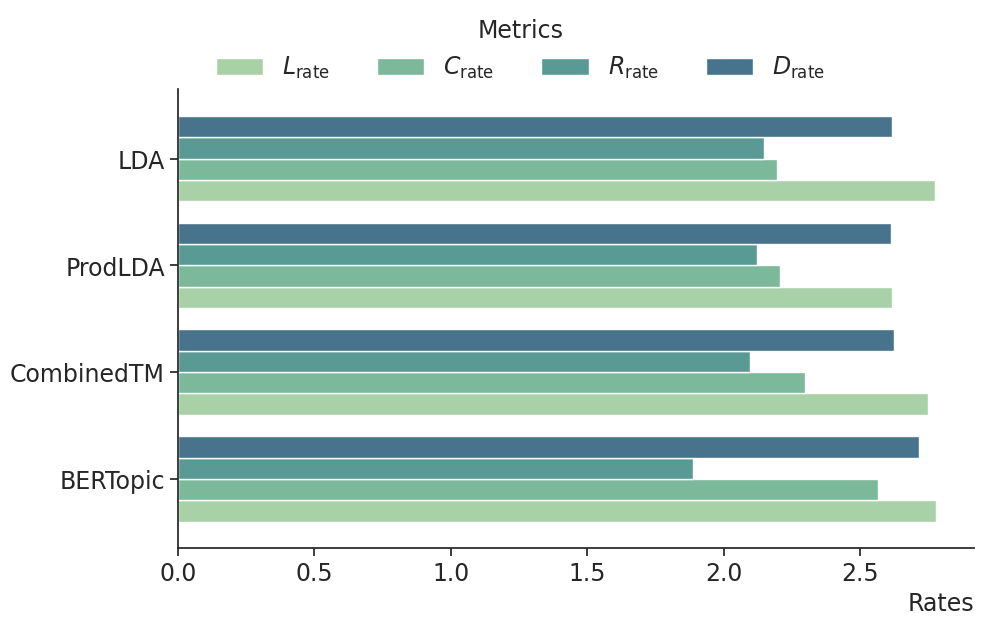

/tmp/ipykernel_2143059/574882844.py:45: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  ax.legend(


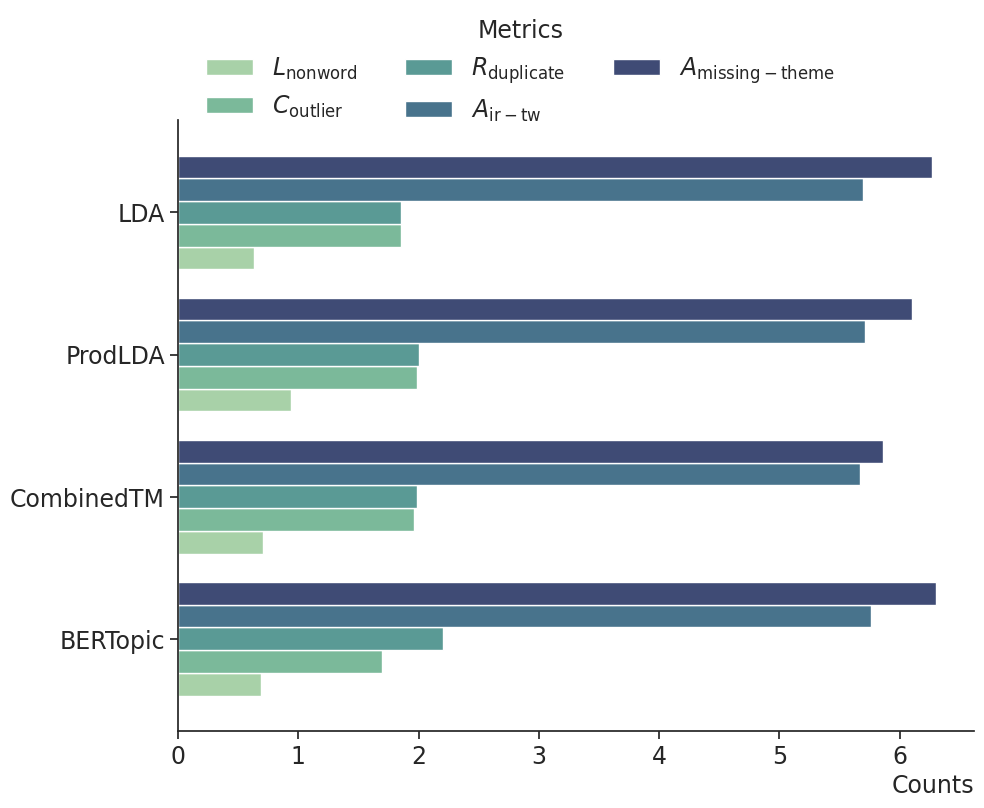

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Updated color palette using cubehelix
custom_palette = sns.cubehelix_palette(5, start=0.5, rot=-0.7, dark=0.3, light=0.75)

sns.set_theme(style="ticks", palette="Set2")

# Data setup
metrics_rate = {
    "L_rate": [2.7742, 2.6180, 2.7488, 2.7791],
    "C_rate": [2.1940, 2.2082, 2.2974, 2.5648],
    "R_rate": [2.1468, 2.1234, 2.0966, 1.8867],
    "D_rate": [2.6184, 2.6132, 2.6259, 2.7167]
}
metrics_error = {
    "L_nonword": [0.6310, 0.9419, 0.7069, 0.6877],
    "C_outlier": [1.8564, 1.9880, 1.9607, 1.6963],
    "R_duplicate": [1.8525, 2.0035, 1.9869, 2.2055],
    "A_ir-tw": [5.6942, 5.7135, 5.6738, 5.7593],
    "A_missing-theme": [6.2707, 6.1040, 5.8626, 6.3030]
}
models = ["LDA", "ProdLDA", "CombinedTM", "BERTopic"]

# Convert to DataFrames
df_rate = pd.DataFrame(metrics_rate, index=models)
df_error = pd.DataFrame(metrics_error, index=models)

# Reverse row order for plotting top-to-bottom
df_rate = df_rate[::-1]
df_error = df_error[::-1]

def label_to_math(label):
    if "_" in  label:
        family = label.split('_')[0]
        method = label.split('_')[1]
        output = '$' + family + '_{\mathrm{' + method+ '}}$'
    return output

# Plotting function
def plot_metric_group(df, title, ncol, hight, x_label):
    ax = df.plot(kind="barh", color=custom_palette, figsize=(10, hight), edgecolor=None, width=0.8)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(
    handles[::-1], 
    labels = [label_to_math(label) for label in labels],
    title="Metrics",
    loc='upper center',
    bbox_to_anchor=(0.43, 1.2),
    ncol=ncol,
    frameon=False,
    fontsize=17,
    title_fontsize=17
    )

    #plt.title(title, fontsize=13)
    plt.xticks(fontsize=17)
    plt.yticks(fontsize=17)
    plt.xlabel(x_label, fontsize=17, loc="right")
    #plt.ylabel("Model", fontsize=17)
    sns.despine(left=False, bottom=False) 
    plt.tight_layout()
    return ax

# Create both plots
plot_metric_group(df_rate, "Cross-Model Comparison (Rating-Based Metrics)", ncol=4, hight=6.5, x_label="Rates")
plt.show()

plot_metric_group(df_error, "Cross-Model Comparison (Error-Count Metrics)", ncol=3, hight=8.3, x_label="Counts")
plt.show()
